In [ ]:
# this is a simple example of NON-GxE.
# this is an example of additive effect of G and E.
# i.e. G and E independently affect phenotype.

In [1]:
import random
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

In [2]:
# make toy data
df=pd.DataFrame()
df['E']= [1] * 50 + [2] * 50  # environment
df['G']=[ random.choice([0, 1, 2]) for _ in range(100) ]  # genotype
df['pheno']= np.random.rand(100) * (df['G'] + df['E'])  # phenotype, additive of G and E

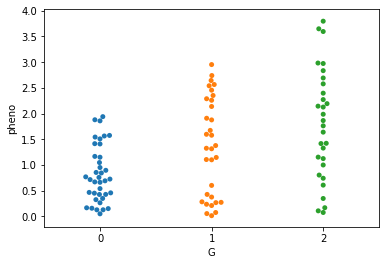

In [3]:
sns.swarmplot(data=df, x='G', y='pheno')

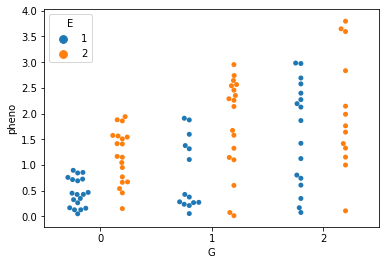

In [4]:
sns.swarmplot(data=df, x='G', y='pheno', hue='E', dodge=True)

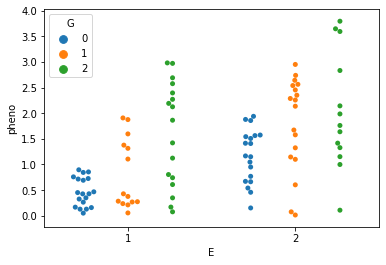

In [5]:
sns.swarmplot(data=df, x='E', y='pheno', hue='G', dodge=True)

In [6]:
# fit linear model for G
reg=smf.ols(formula='pheno ~ G', data=df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  pheno   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     21.90
Date:                Thu, 17 Jun 2021   Prob (F-statistic):           9.21e-06
Time:                        13:51:26   Log-Likelihood:                -125.65
No. Observations:                 100   AIC:                             255.3
Df Residuals:                      98   BIC:                             260.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8358      0.129      6.480      0.000       0.580       1.092
G              0.4896      0.105      4.680      0.000       0.282       0.697
==============================================================================
Omnibus:                        2.693   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.260   Jarque-Bera (JB):                1.892
Skew:                           0.139   Prob(JB):                        0.388
Kurtosis:                       2.386   Cond. No.                         2.70
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
# fit linear model, GxE
df['GxE']= df['G'] * df['E']
reg=smf.ols(formula='pheno ~ G + E + GxE', data=df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  pheno   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     15.69
Date:                Thu, 17 Jun 2021   Prob (F-statistic):           2.22e-08
Time:                        13:52:04   Log-Likelihood:                -115.78
No. Observations:                 100   AIC:                             239.6
Df Residuals:                      96   BIC:                             250.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4237      0.375     -1.130      0.261      -1.168       0.320
G              0.6940      0.298      2.332      0.022       0.103       1.285
E              0.8277      0.236      3.502      0.001       0.358       1.297
GxE           -0.1250      0.192     -0.650      0.517      -0.507       0.257
==============================================================================
Omnibus:                        0.710   Durbin-Watson:                   2.302
Prob(Omnibus):                  0.701   Jarque-Bera (JB):                0.812
Skew:                          -0.099   Prob(JB):                        0.666
Kurtosis:                       2.606   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
'''

Interpretation:

  Here we prepared toy data for G and E additive case.
  
  We observed high beta for G when we did not put the
  interaction term 'GxE' in the regression model.
  
  When we put 'GxE' in the regression model, we did not observe
  high beta for GxE, showing GxE analysis does not detect
  additive effect of G and E.
  
  Caveats: Here, I did not standalize data for simplicity. In real cases,
           we need to standalize data to obtain appropriate beta.
           (see also chapter 11)
  
'''